In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import csv

# Part 1:

In [2]:
def build_dataset(N):
    T_K = []
    X = []
    for k in range(1, N+1):
        t_k = 2 * np.pi * k / (N + 1)
        T_K.append(t_k)
        X.append([np.cos(t_k), np.sin(t_k)])
    return np.asarray(T_K), np.asarray(X)

In [3]:
def distance_matrix(X):
    D = [[np.linalg.norm(x1-x2) for x2 in X] for x1 in X]
    return np.asarray(D)

In [4]:
def diffusion_map(X, L):
    D = distance_matrix(X)
    epsilon = 0.05 * np.max(D)
    W = np.exp(-np.power(D,2)/epsilon)
    P = np.diag(np.sum(W, axis=1))
    P_inv = np.linalg.inv(P)
    K = P_inv @ W @ P_inv
    Q = np.diag(np.sum(K, axis=1))
    Q_inv = fractional_matrix_power(Q, -0.5)
    T_hat = Q_inv @ K @ Q_inv
    A, V = np.linalg.eig(T_hat)
    lambdas = np.sqrt(np.power(A[:L+1], 1 / epsilon))
    vectors = Q_inv @ V[:,:L+1]
    return lambdas, vectors

(1000,)
(1000, 2)


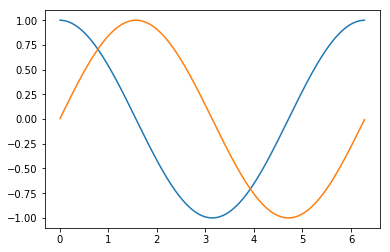

In [5]:
T_K, X = build_dataset(1000)
print(T_K.shape)
print(X.shape)
plt.plot(T_K, X.T[0])
plt.plot(T_K, X.T[1])

In [6]:
lambdas, vectors = diffusion_map(X, 5)

/Users/mahdisellami/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


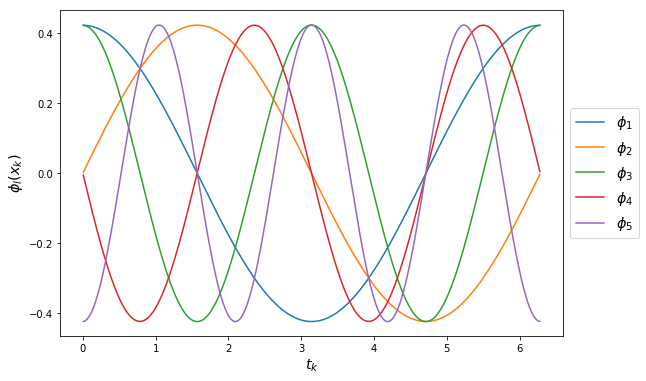

In [7]:
plt.figure(figsize=(9,6))
plt.plot(T_K, vectors[:,1])
plt.plot(T_K, vectors[:,2])
plt.plot(T_K, vectors[:,3])
plt.plot(T_K, vectors[:,4])
plt.plot(T_K, vectors[:,5])
plt.xlabel('$t_k$', fontsize='x-large')
plt.ylabel('$\phi_l(x_k)$', fontsize='x-large')
plt.legend(['$\phi_1$','$\phi_2$','$\phi_3$','$\phi_4$','$\phi_5$'], fontsize = 'x-large', loc='center left', bbox_to_anchor=(1, 0.5))

# Part 2:

In [8]:
X, _ = make_swiss_roll(n_samples=5000, noise=0.0, random_state=None)
print(X.shape)

(5000, 3)


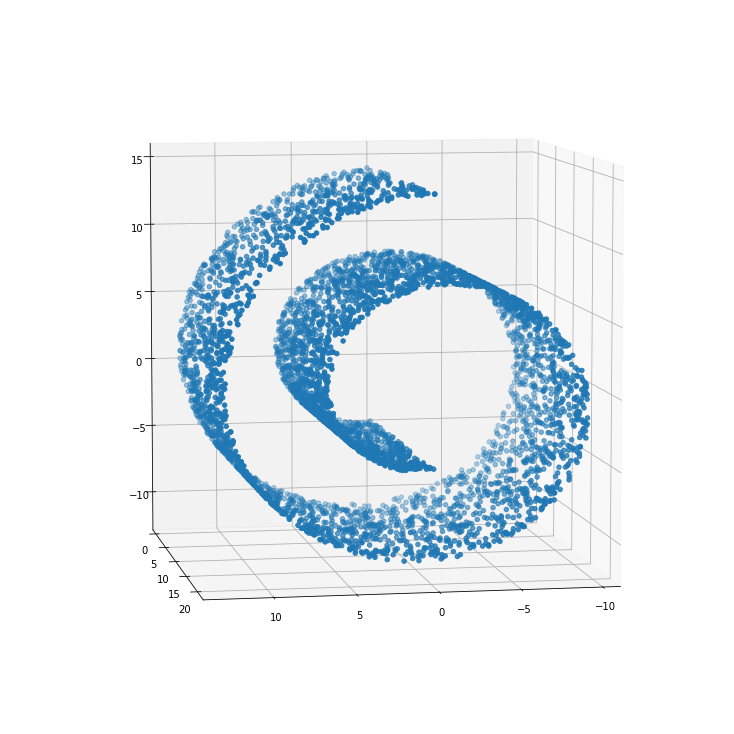

In [9]:
fig = plt.figure(figsize=(10.,10.))
ax = Axes3D(fig)
ax.view_init(7, 80)
ax.scatter(X.T[0], X.T[1], X.T[2],'bo')

In [10]:
lambdas, vectors = diffusion_map(X, 10)

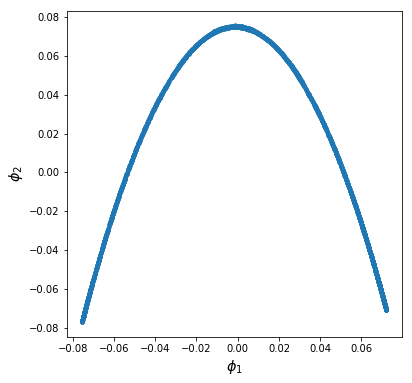

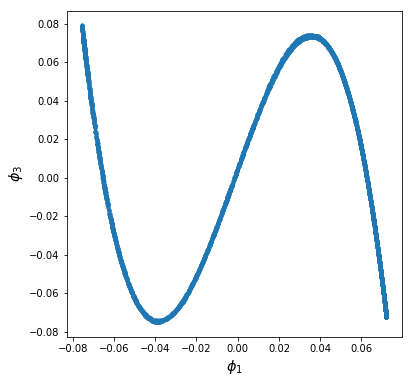

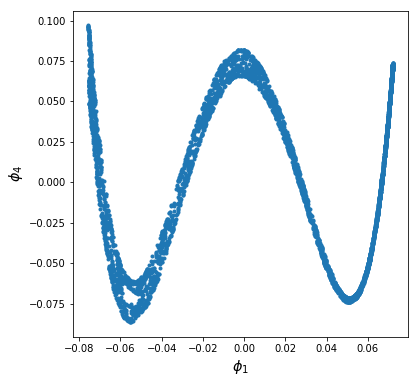

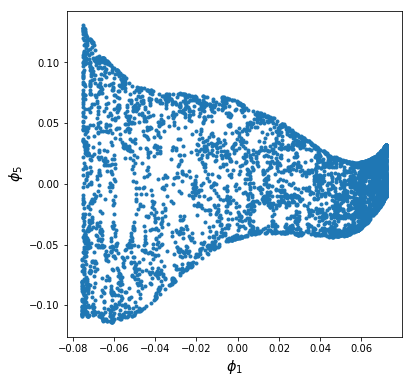

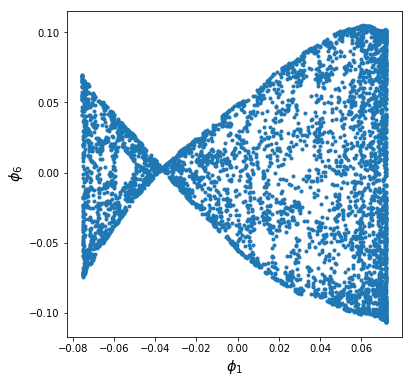

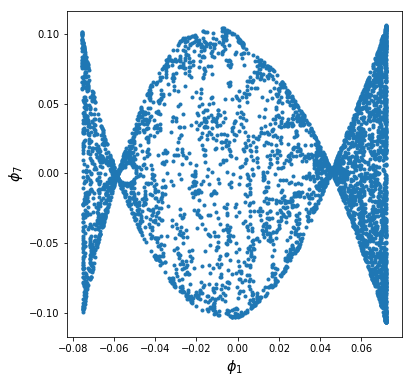

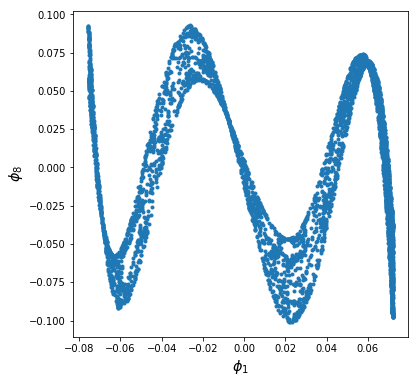

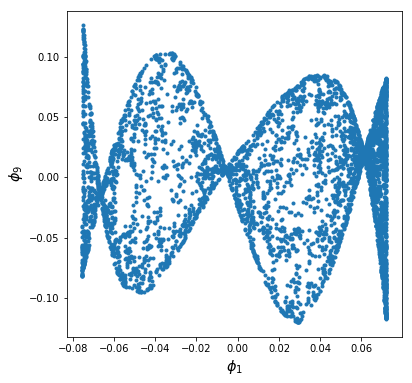

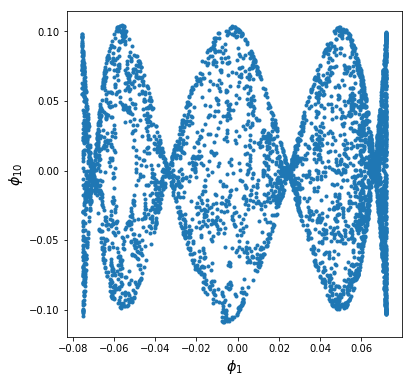

In [11]:
for i in range(2,11):
    plt.figure(figsize=(6,6))
    plt.plot(vectors[:,1], vectors[:,i], '.')
    plt.xlabel('$\phi_1$', fontsize='x-large')
    plt.ylabel('$\phi_{' + str(i) + '}$', fontsize='x-large')

(5000, 4)


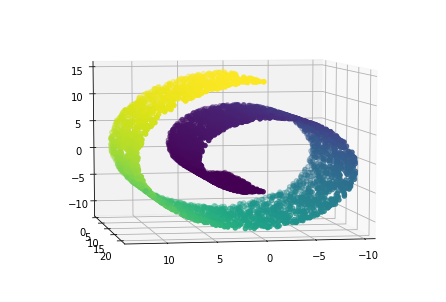

In [12]:
viridis = cm.get_cmap('viridis', 12)
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(7, 80)
print(viridis(vectors[:,1]).shape)

ax.scatter(X.T[0], X.T[1], X.T[2], 'o', c=vectors[:,1], cmap='viridis_r')

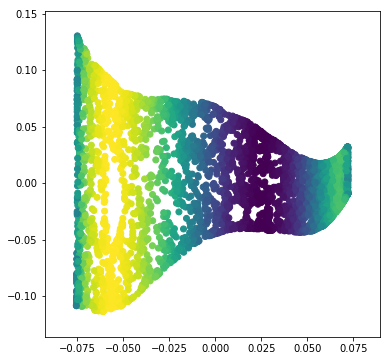

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(vectors[:,1], vectors[:,5], c=X.T[0], cmap='viridis')

Loss=0.24547738474894598


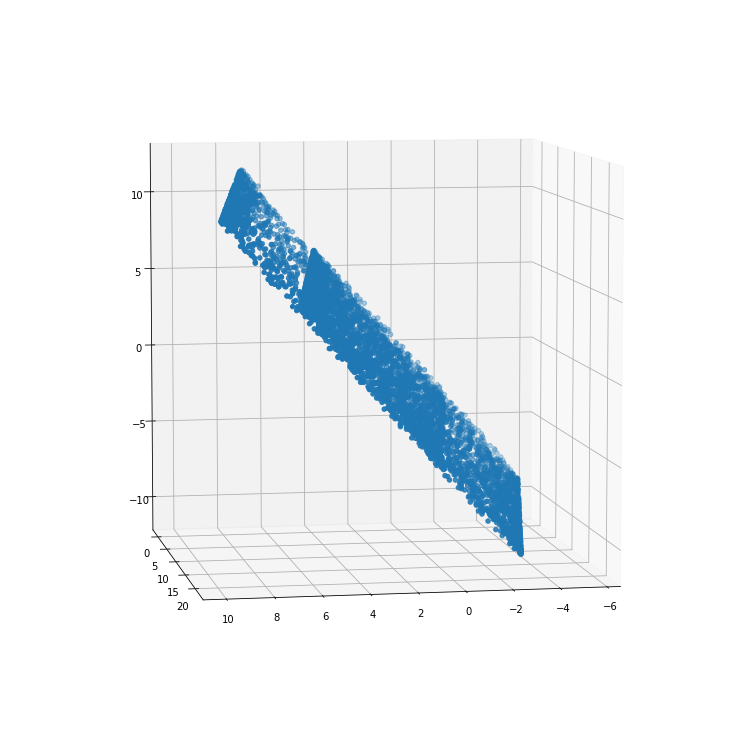

In [14]:
L = 2
u, s, vh = np.linalg.svd(X, 0)
loss = 1 - np.sum(s[:L]/np.sum(s))
for i in range(L, s.shape[0]):
    s[i] = 0
new_X= u @ np.diag(s) @ vh

print('Loss=' + str(loss))
fig = plt.figure(figsize=(10.,10.))
ax = Axes3D(fig)
ax.view_init(7, 80)
ax.scatter(new_X.T[0], new_X.T[1], new_X.T[2], 'o')

# Part 3:

In [15]:
def get_data_matrix(filename):
    with open(filename, newline='') as file:
        reader = csv.reader(file, delimiter=' ')
        X = []
        for row in reader:
            X.append(np.float64(row))
    X = np.asarray(X)
    return X

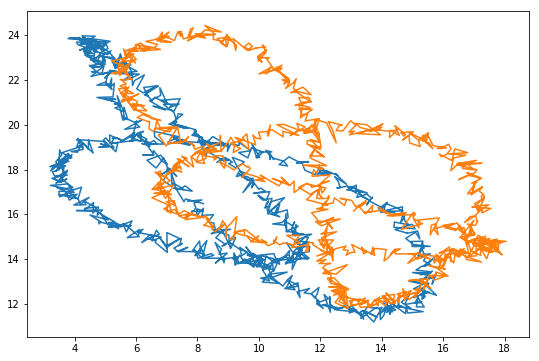

In [16]:
X = get_data_matrix('data_DMAP_PCA_vadere.txt')


plt.figure(figsize=(9,6))
plt.plot(X.T[0],X.T[1])
plt.plot(X.T[2],X.T[3])

In [17]:
lambdas, vectors = diffusion_map(X, 10)

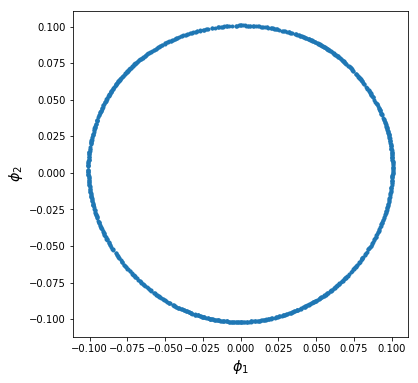

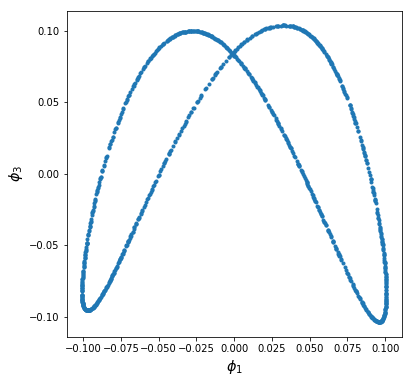

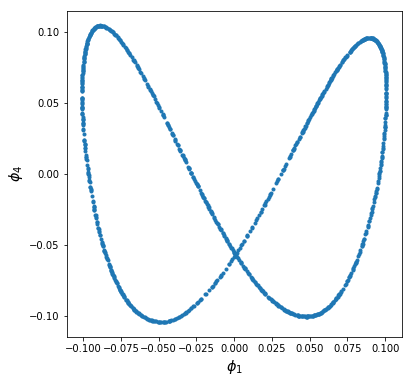

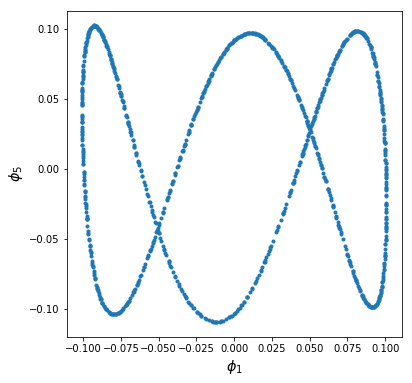

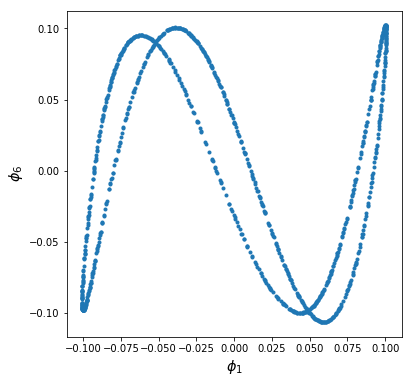

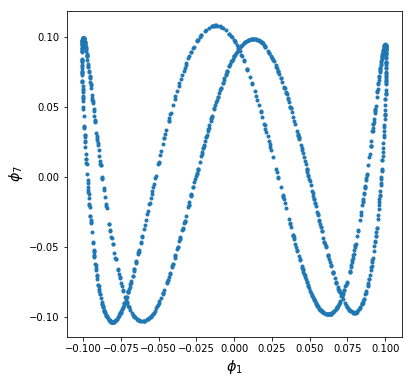

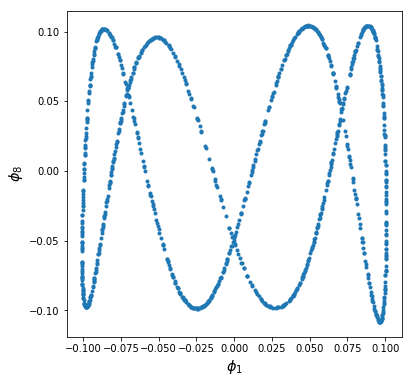

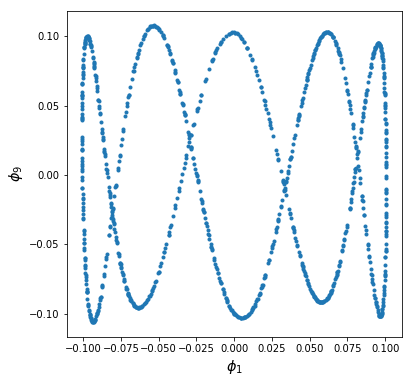

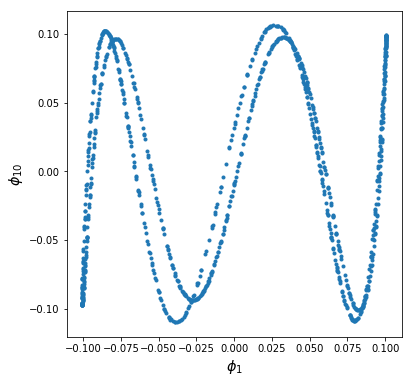

In [18]:
for i in range(2,11):
    plt.figure(figsize=(6,6))
    plt.plot(vectors[:,1], vectors[:,i], '.')
    plt.xlabel('$\phi_1$', fontsize='x-large')
    plt.ylabel('$\phi_{' + str(i) + '}$', fontsize='x-large')